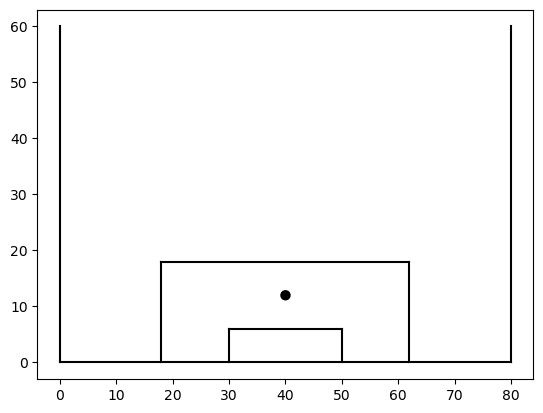

In [1]:
#The basics
import pandas as pd
import numpy as np
import json

#Xg MODEL
from expectedGoal import xG

#Plotting
import matplotlib.pyplot as plt
import FCPython 

#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [61]:
data1 = pd.read_csv('crossData.csv')

In [60]:
data1['Y1'].describe()

count    62316.000000
mean        85.924803
std          8.180670
min         50.000000
25%         80.000000
50%         88.000000
75%         92.000000
max        100.000000
Name: Y1, dtype: float64

In [98]:
#plot all crosses
pitchLengthX=120
pitchWidthY=80

#areas of possible cross
maxX = 22
data = data1[data1['inverted']==0]
data=data1

In [88]:
#plot only successful crosses
dataS = data[data['Successful']==1]
dataG = data[data['Goal']==1]
#plotting only high expected goals
minXG = 0.3
dataxG = data[(data['xG']>minXG) | (data['Goal']==1)]
#make histogram of start crosses
H_Cross_start = np.histogram2d(data['Y1']/100*pitchWidthY, data['X1']/100*pitchLengthX,bins=50,range=[[0, pitchWidthY],[0, pitchLengthX]])
H_Cross_startS = np.histogram2d(dataS['Y1']/100*pitchWidthY, dataS['X1']/100*pitchLengthX,bins=50,range=[[0, pitchWidthY],[0, pitchLengthX]])
H_Cross_startG = np.histogram2d(dataG['Y1']/100*pitchWidthY, dataG['X1']/100*pitchLengthX,bins=50,range=[[0, pitchWidthY],[0, pitchLengthX]])
H_Cross_startxG = np.histogram2d(dataxG['Y1']/100*pitchWidthY, dataxG['X1']/100*pitchLengthX,bins=50,range=[[0, pitchWidthY],[0, pitchLengthX]])
H_Cross_end = np.histogram2d(dataS['Y2']/100*pitchWidthY, dataS['X2']/100*pitchLengthX,bins=50,range=[[0, pitchWidthY],[0, pitchLengthX]])


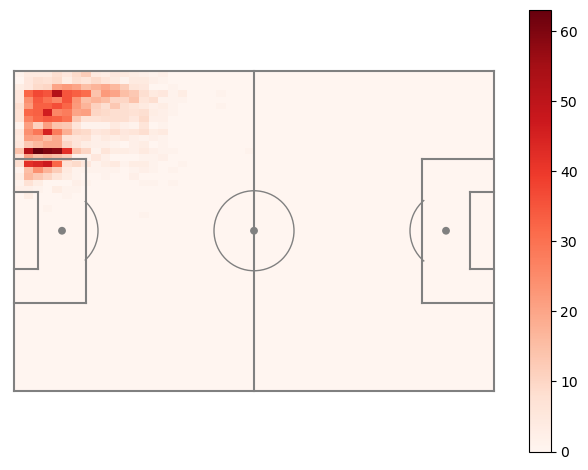

In [89]:


#make histogram of start crosses
H_Cross_start = np.histogram2d(data['Y1']/100*pitchWidthY, data['X1']/100*pitchLengthX,bins=50,range=[[0, pitchWidthY],[0, pitchLengthX]])
#H_Cross_end = np.histogram2d(data['Y2']/100*pitchWidthY, data['X2']/100*pitchLengthX,bins=50,range=[[0, pitchWidthY],[0, pitchLengthX]])

from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
pos=ax.imshow(H_Cross_startxG[0], extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
#ax.set_title('Danger passes per match by ' + team_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
ax.set_aspect('equal')
ax.grid(True,which='both')
plt.show()


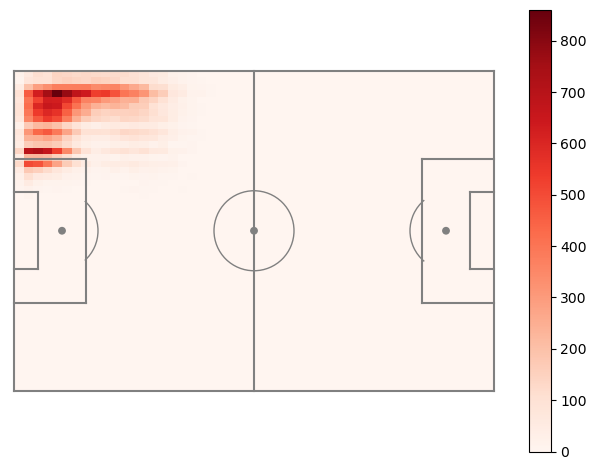

In [90]:

from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
pos=ax.imshow(H_Cross_start[0], extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
#ax.set_title('Danger passes per match by ' + team_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

/tmp/ipykernel_3932/278697157.py:3: RuntimeWarning: invalid value encountered in divide
  pos=ax.imshow(H_Cross_startxG[0]/H_Cross_startS[0], extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)


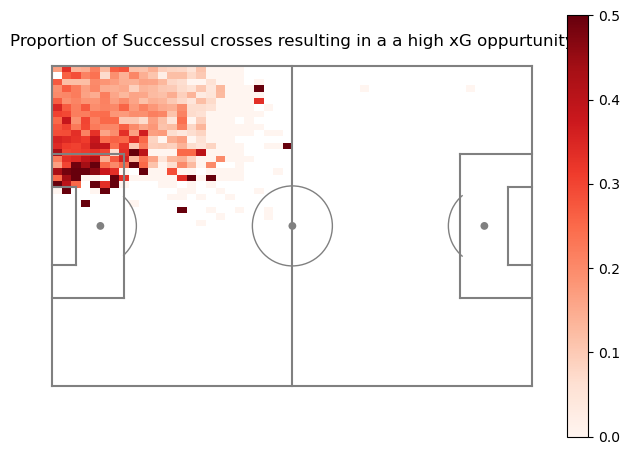

In [92]:
#Plot the probability of scoring from a successful cross
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
pos=ax.imshow(H_Cross_startxG[0]/H_Cross_startS[0], extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)
fig.colorbar(pos, ax=ax)
ax.set_title('Proportion of Successul crosses resulting in a a high xG oppurtunity')
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

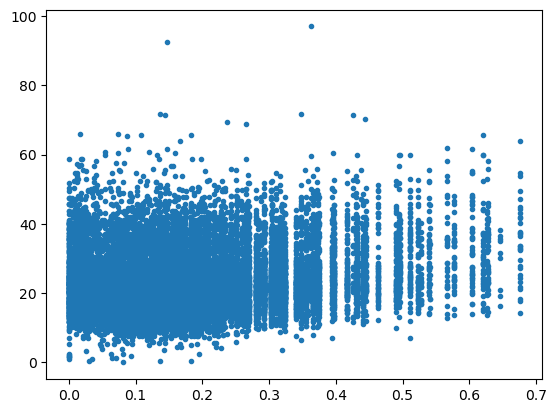

In [100]:
sdf = data[data['Successful']==1]
plt.figure()
plt.plot(sdf['xG'],sdf['Angle'],'.')
#plt.axis([0.2,0.7,0,70])
#ValueError: x and y must have same first dimension, but have shapes (41,) and (40,)
middis= (dis[:-1] + dis[1:])/2


In [117]:
model_variables = ['Angle']#,'X','C']
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]

In [95]:
test_model = smf.glm(formula="Successful~"+model , data=data, 
                           family=sm.families.Binomial()).fit()
print(test_model.summary())        
b=test_model.params

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Successful   No. Observations:                51647
Model:                            GLM   Df Residuals:                    51644
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31763.
Date:                Wed, 26 Oct 2022   Deviance:                       63525.
Time:                        14:49:25   Pearson chi2:                 5.17e+04
No. Iterations:                     5   Pseudo R-squ. (CS):           0.002051
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1964      0.189     -6.318      0.0

In [118]:
#xG vs model
mXG = 0
lm = smf.ols(formula='xG~'+model, data = data[(data['Successful']==1) & (data['xG']>mXG)])
#lm = smf.ols(formula='xG~'+model, data = data)
lmr = lm.fit()
print(lmr.summary())
b=lmr.params

                            OLS Regression Results                            
Dep. Variable:                     xG   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     523.6
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          2.19e-114
Time:                        15:12:45   Log-Likelihood:                 13493.
No. Observations:               19568   AIC:                        -2.698e+04
Df Residuals:                   19566   BIC:                        -2.697e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1316      0.002     52.872      0.0

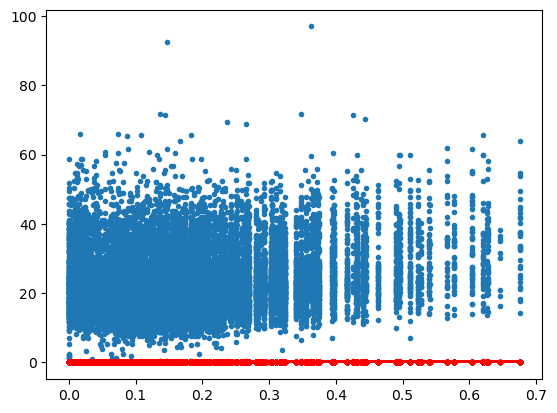

In [119]:
sdf = data[data['Successful']==1]
fig, ax = plt.subplots()
ax.plot(sdf['xG'],sdf['Angle'],'.')
ax.plot(sdf['xG'], lmr.predict(), "r--.", label="OLS")
#plt.axis([0.2,0.7,0,70])

